Using TensorFlow backend.


(3000, 80, 80) (3000, 80, 80) (3000,)


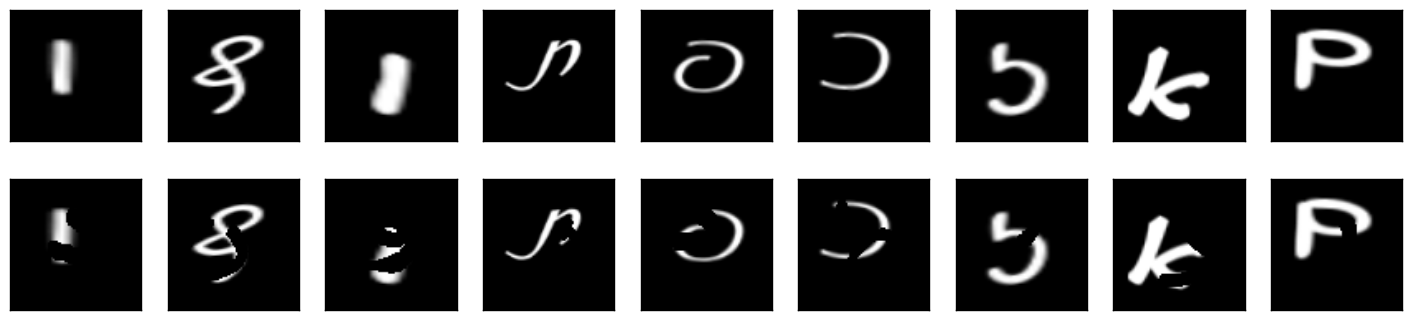

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K
import os 
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import overlap_arabic_hebrew_characters
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
K.set_image_dim_ordering('tf')


x_noisy,x,l= overlap_arabic_hebrew_characters.read_byte_overlaps('broken-letters.hdf5')
print(x_noisy.shape,x.shape,l.shape)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display broken
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [2]:
split_point = int(len(x) * 0.8)
x_train, x_test = x[0:split_point], x[split_point:]
x_train_noisy, x_test_noisy = x_noisy[0:split_point], x_noisy[split_point:]

In [3]:

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 80, 80, 1))  
x_test = np.reshape(x_test, (len(x_test), 80, 80, 1)) 
x_train_noisy = x_train_noisy.astype('float32') / 255.
x_test_noisy = x_test_noisy.astype('float32') / 255.
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 80, 80, 1))  
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 80, 80, 1))  

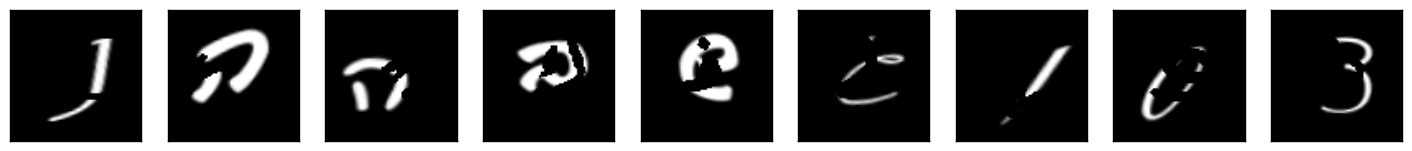

In [4]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(80,80))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
input_img = Input(shape=(80, 80, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 4s 1ms/step - loss: 0.5395 - val_loss: 0.1482
Epoch 2/100
2400/2400 [==============================] - 1s 548us/step - loss: 0.1188 - val_loss: 0.1066
Epoch 3/100
2400/2400 [==============================] - 1s 550us/step - loss: 0.1036 - val_loss: 0.1002
Epoch 4/100
2400/2400 [==============================] - 1s 550us/step - loss: 0.0992 - val_loss: 0.0949
Epoch 5/100
2400/2400 [==============================] - 1s 552us/step - loss: 0.0951 - val_loss: 0.0934
Epoch 6/100
2400/2400 [==============================] - 1s 534us/step - loss: 0.0914 - val_loss: 0.0943
Epoch 7/100
2400/2400 [==============================] - 1s 534us/step - loss: 0.0910 - val_loss: 0.0884
Epoch 8/100
2400/2400 [==============================] - 1s 536us/step - loss: 0.0881 - val_loss: 0.0867
Epoch 9/100
2400/2400 [==============================] - 1s 533us/step - loss: 0.0864 - val_loss: 0.0844
Epoch 10/1

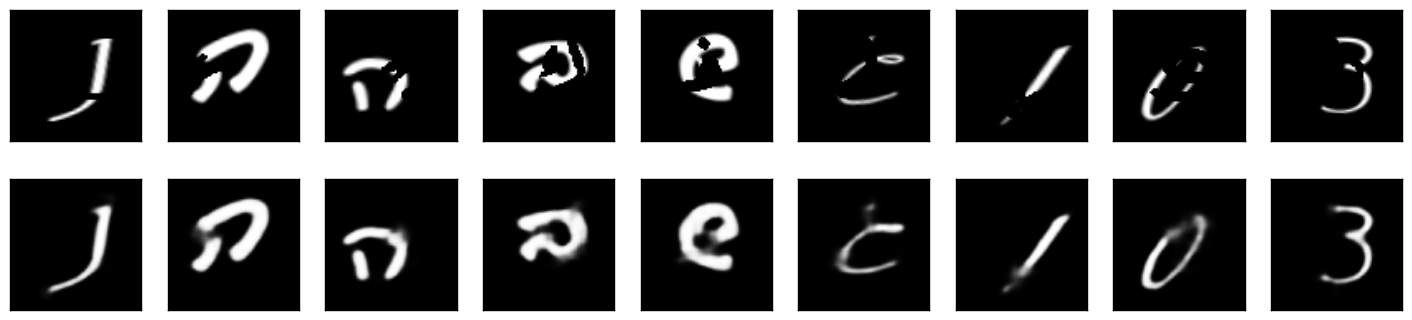

In [7]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(80, 80))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display restored
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(80, 80))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()